# Weekly project part 1
Using the image "appletree.jpg"
1) Can you segment the apples from the tree?
2) Can you get the computer to count how many there are? 
    How close can you get to the ground truth? (there are 26 apples in the image)
3) Can you change the color of one of them?
4) Can you segment the leaves?
    
    



In [314]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
!pip install imutils
import imutils 

width=1600, height=1200, depth=3


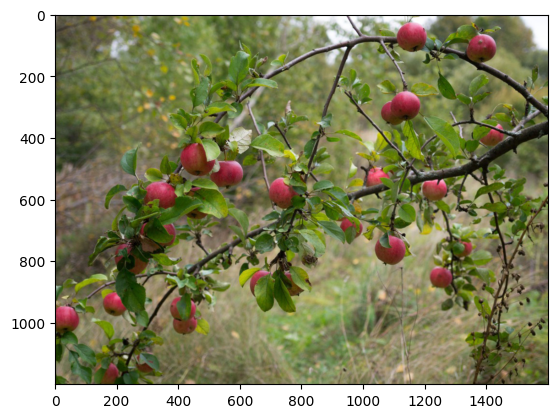

In [315]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(image)

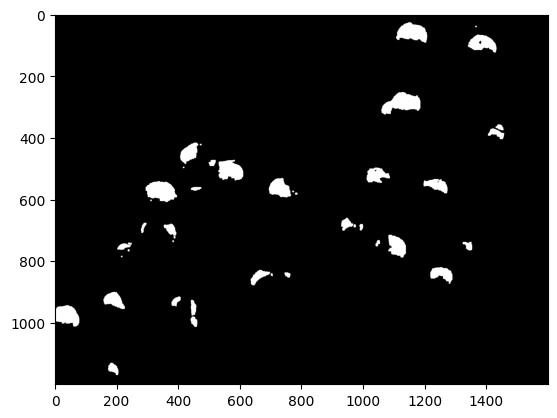

In [316]:
hsvFrame = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
red_lower = np.array([136, 87, 111], np.uint8)
red_upper = np.array([180, 255, 255], np.uint8)
    
# define mask
red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)
kernal = np.ones((5, 5), "uint8")

    # red color
red_mask = cv2.dilate(red_mask, kernal)
res_red = cv2.bitwise_and(hsvFrame, hsvFrame, mask=red_mask)
contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

output = cv2.drawContours(hsvFrame, contours, -1, (0, 255, 0), 3)
mask = cv2.cvtColor(red_mask, cv2.COLOR_GRAY2BGR)
plt.imshow(mask)


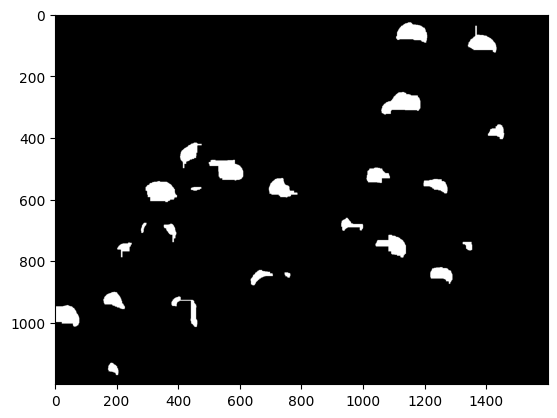

In [317]:
close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal, iterations=9)
plt.imshow(close)

24


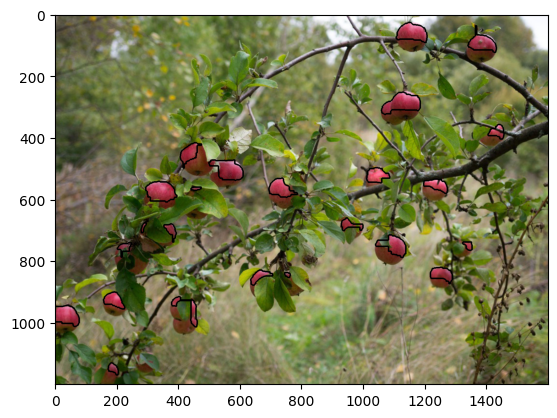

In [318]:
# Convert close to grayscale if it is not already single-channel
if close.ndim == 3:
    close_gray = cv2.cvtColor(close, cv2.COLOR_BGR2GRAY)
else:
    close_gray = close.copy()

cnts = cv2.findContours(close_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)
print(len(cnts))

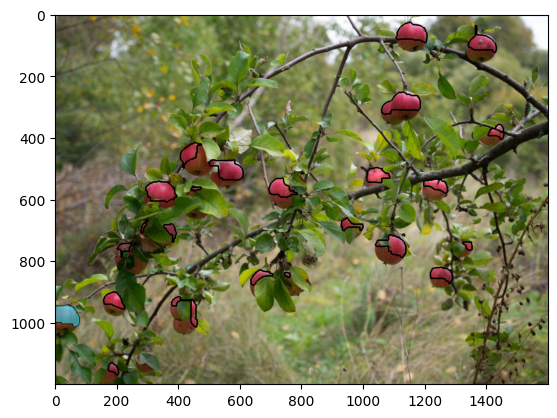

In [319]:
blend_color = (0, 255, 255)  # BGR, e.g. yellow
alpha = 0.5                  # 0 = no change, 1 = full solid

# make a mask for the contour
mask = np.zeros(image.shape[:2], np.uint8)
cv2.drawContours(mask, [cnts[1]], -1, 255, thickness=cv2.FILLED)

# solid overlay image
overlay = np.full_like(image, blend_color)

# blend only where mask is white
output[mask == 255] = cv2.addWeighted(
    image[mask == 255], 1 - alpha,
    overlay[mask == 255], alpha,
    0
)

plt.imshow(output)

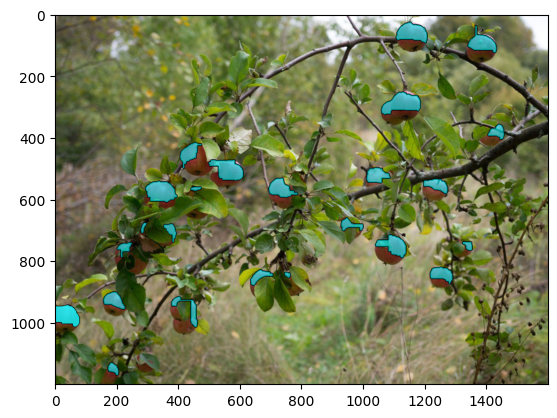

In [320]:
def fill_contour_blend(img, cnt, bgr=(0,255,255), alpha=0.6):
    mask = np.zeros(img.shape[:2], np.uint8)
    cv2.drawContours(mask, [cnt], -1, 255, cv2.FILLED)

    target = np.full_like(img, bgr)
    img[mask==255] = cv2.addWeighted(img[mask==255], 1-alpha, target[mask==255], alpha, 0)
    return img

for c in cnts:
    output = fill_contour_blend(output, c)

plt.imshow(output)

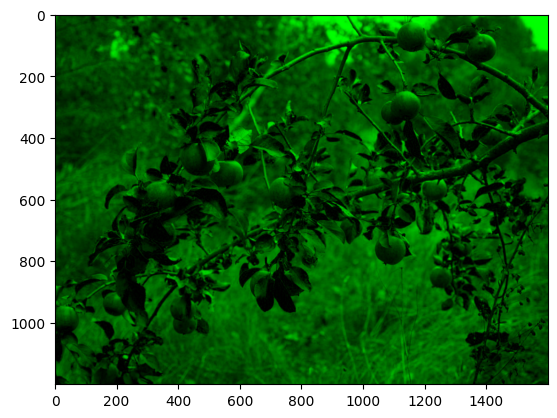

In [321]:
channel = np.zeros_like(image)
channel[:,:,1] = image[:,:,2]
plt.imshow(channel)

2


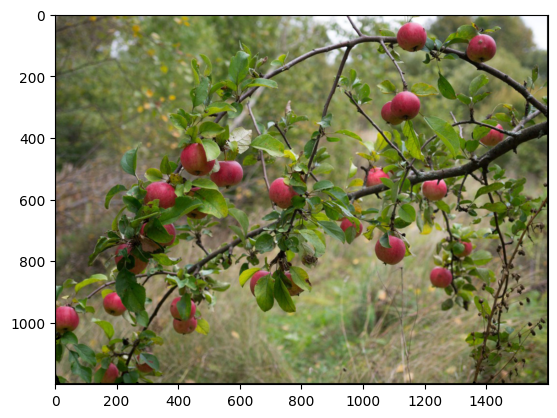

In [323]:
channel_img = cv2.cvtColor(channel, cv2.COLOR_BGR2GRAY)
cnts = cv2.findContours(channel_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)
print(len(cnts))

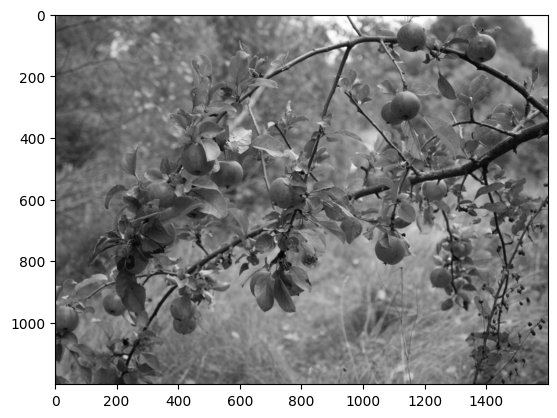

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

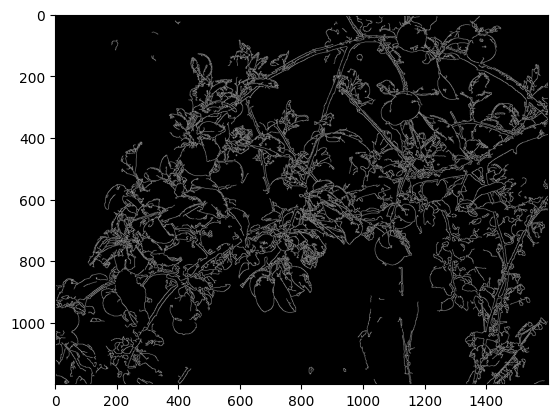

In [ ]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

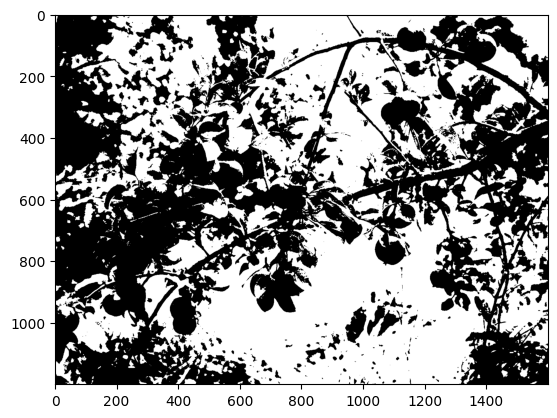

In [ ]:
threshold = 110
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray')

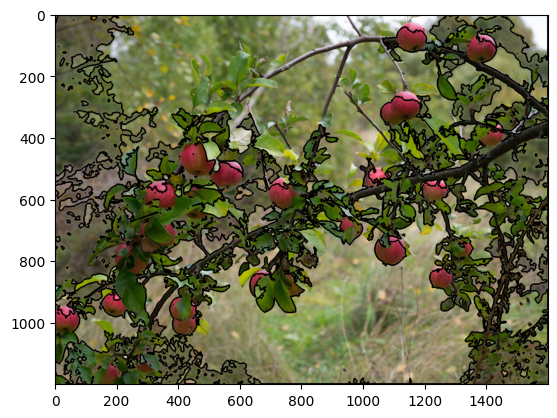

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

# Weekly project part 2
1) Remove the greenscreen and replace the background in "itssp.png".
2) Can you improve the edge with eroding/dilating?